# Dynamic spectrum

<div class="alert alert-block alert-success">
<b>Please refer to the following paper for more information and cite it if you use this tool in your publication:</b><br><br>
Palmroos, C., Gieseler, J., Dresing N., Morosan D. E., Asvestari E., Yli-Laurila A., Price D. J., Valkila S., Vainio R. (2022).
Solar energetic particle time series analysis with Python. <i>Front. Astronomy Space Sci.</i> 9. <a href="https://doi.org/10.3389/fspas.2022.1073578">doi:10.3389/fspas.2022.1073578</a>
</div>

#### First import the necessary library

In [ ]:
from seppy.tools import Event
import seppy.tools.widgets as w
from seppy.util import jupyterhub_data_path
import datetime, os

#### Choose spacecraft, sensor, viewing direction and particle species from the drop-down menu:

In [ ]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)
display(w.radio_drop)

Dropdown(description='Spacecraft:', options=('PSP', 'SOHO', 'Solar Orbiter', 'STEREO-A', 'STEREO-B', 'Wind'), …

Dropdown(description='Sensor:', options=('isois-epihi', 'isois-epilo'), value='isois-epihi')

Dropdown(description='Viewing:', options=('A', 'B'), value='A')

Dropdown(description='Species:', options=('protons', 'electrons'), value='protons')

Dropdown(description='Plot radio spectrum for:', options={'None': None, 'STEREO-A': ('ahead', 'STEREO-A'), 'ST…

#### Set the data path and date range to load data:

In [ ]:
# Set your local path where you want to save the data files. If run on the project's JupyterHub server, it's set to a common data folder in the base directory. 
data_path = f"{os.getcwd()}{os.sep}data"
data_path = jupyterhub_data_path(data_path)

# Format of date: year, month, day
startdate = datetime.date(2021, 10, 28)
enddate = datetime.date(2021, 10, 29)

# Set the time range for the plot (Leave to None to plot the entire data file):
plot_range = ["2021-10-28 00:00", "2021-10-28 23:00"]

# Set the averaging period, or leave to None to not resample data
# averaging should be a pandas-compatible string, e.g. '1h', '2min', '15s'
averaging = None #"2min"

# Select the color map used for the plot, by default 'magma'
# for avavailable options, cf. https://matplotlib.org/stable/tutorials/colors/colormaps.html
cmap = 'magma'  # e.g. 'jet', 'viridis', 'magma'

#### Just run, don't edit:

In [ ]:
# Get event data:
Event_class = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, 
                    data_level='l2', species = w.species_drop.value, viewing=w.view_drop.value,
                    start_date = startdate, end_date = enddate, 
                    radio_spacecraft = w.radio_drop.value,
                    data_path = data_path)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

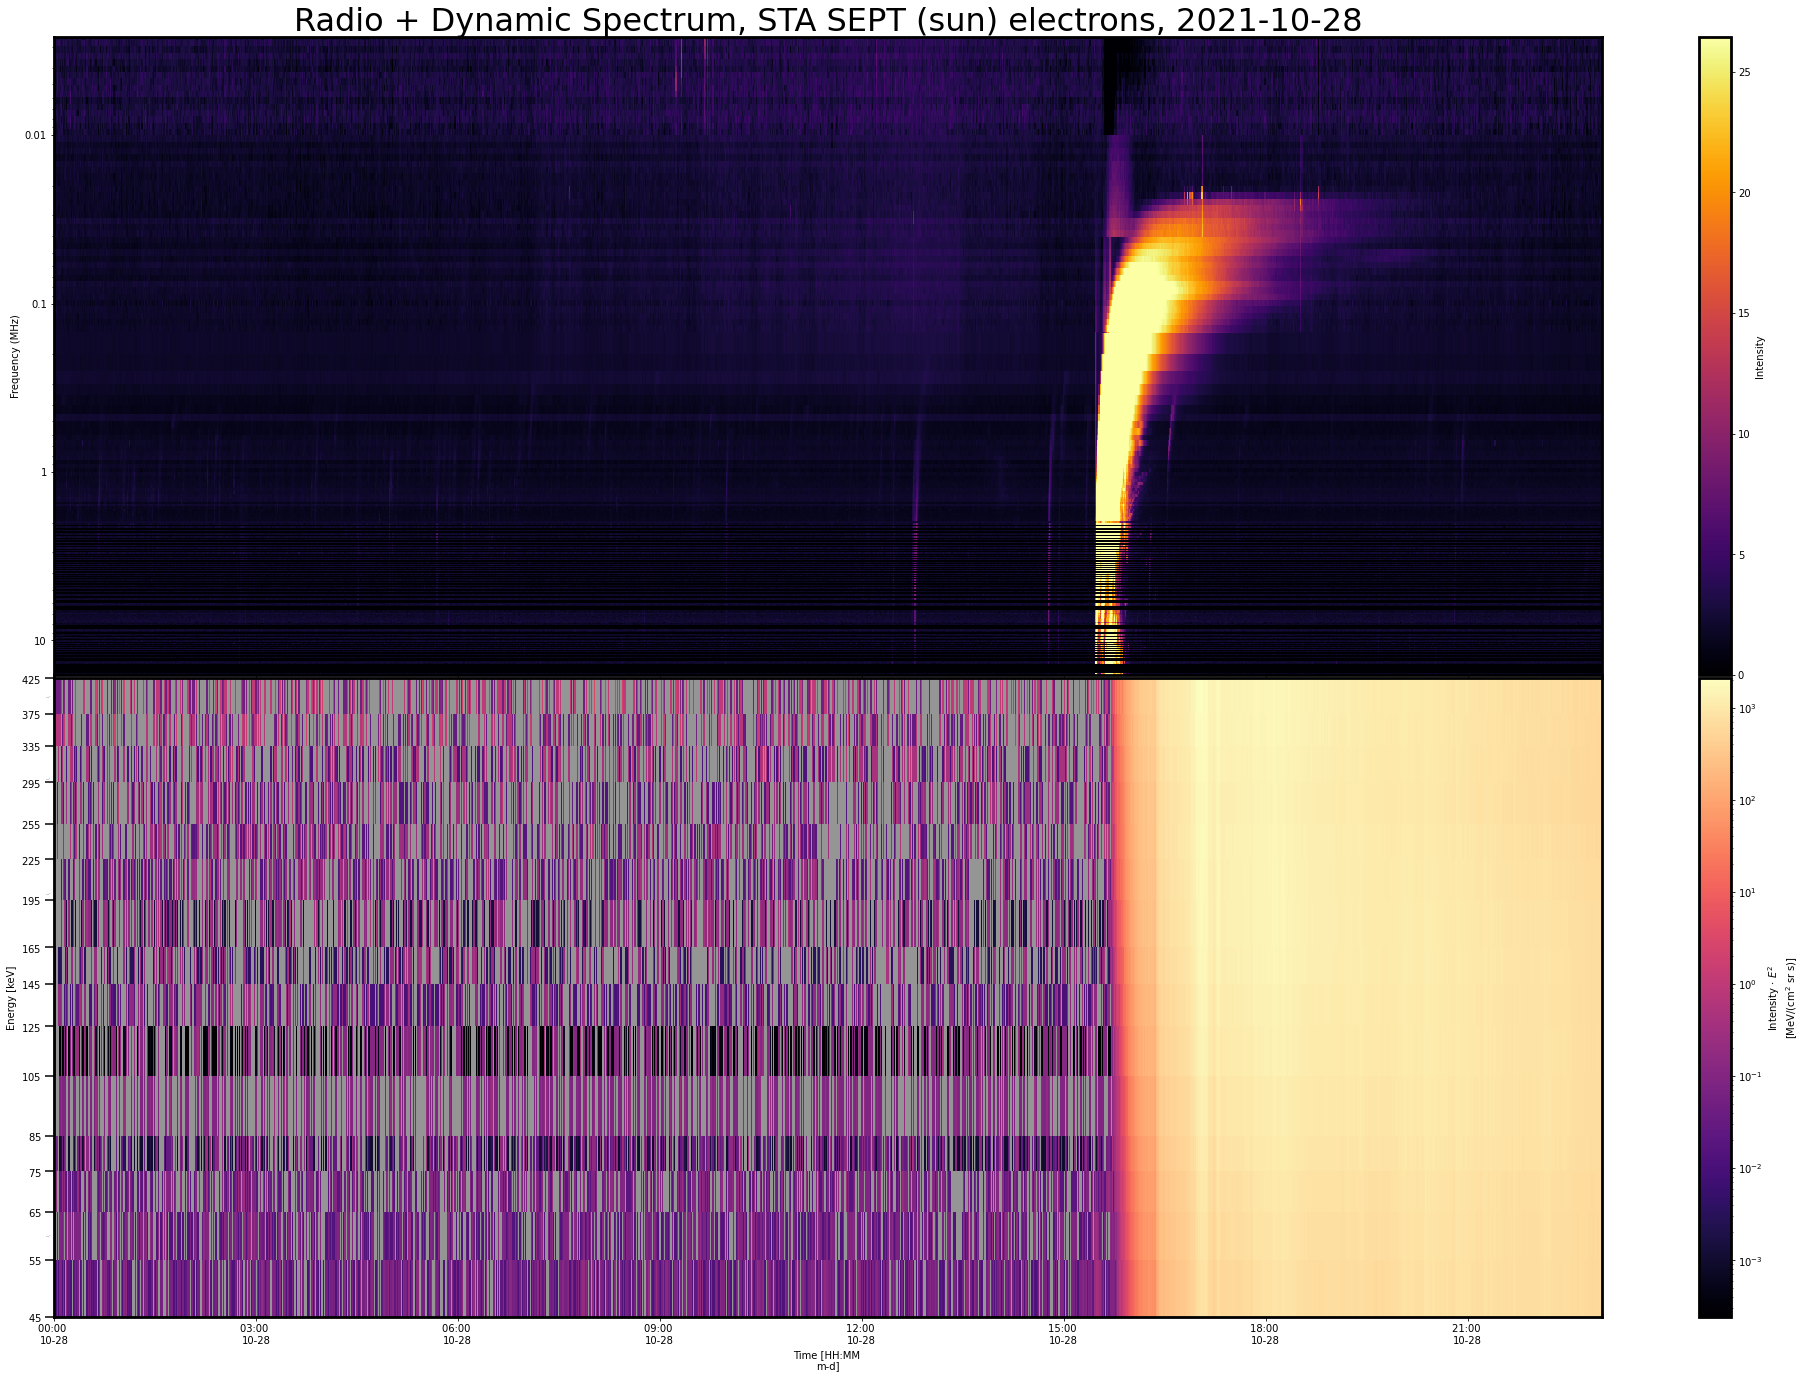

In [ ]:
Event_class.dynamic_spectrum(w.view_drop.value, cmap=cmap, xlim=plot_range, resample=averaging)

#### Saving the figure

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar). Alternatively, run the following cell.

In [ ]:
# Path to save the plots
plot_path = f'{os.getcwd()}'

# Use a pre-generated name for the file:
if w.radio_drop.value is None:
    file_name = f"{plot_path}{os.sep}{w.spacecraft_drop.value.replace(' ', '_')}_{w.sensor_drop.value}_{w.view_drop.value+'_' if w.view_drop.value is not None else ''}{w.species_drop.value}{'_'+averaging if averaging is not None else ''}_{startdate.strftime('%Y%m%d')}.png"
else:
    file_name = f"{plot_path}{os.sep}{w.radio_drop.value[1]}_radio_spectrum_{w.spacecraft_drop.value.replace(' ', '_')}_{w.sensor_drop.value}_{w.view_drop.value+'_' if w.view_drop.value is not None else ''}{w.species_drop.value}{'_'+averaging if averaging is not None else ''}_{startdate.strftime('%Y%m%d')}.png"

# Or type your own here:
# file_name = ""

In [ ]:
# Check that the name is correct
print(file_name)

/home/gieseler/uni/serpentine/serpentine/notebooks/sep_analysis_tools/STEREO-A_radio_spectrum_STEREO-A_SEPT_sun_electrons_20211028.png


In [ ]:
# Save plot
Event_class.fig.savefig(file_name, facecolor="white", transparent=False)

---
## FAQ / Problems <a class="anchor" id="faq"></a>

- **Saving figures**

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar).

- **I get some error about missing data, or that the data is broken, or something I don't understand.**

Most times such a problem originates in an incomplete download of the corresponding data file. The easiest approach to solve that problem is to delete the file and run the code again to re-download it. 
To do this, first check if a `path` has been provided. If `path` has *not* been defined (or as `None`), the standard `path` for SunPy downloads should have been used. You can obtain it by running the following code cell:


In [ ]:
import sunpy 
sunpy.config.get('downloads', 'download_dir')

'/home/gieseler/sunpy/data'

Open the corresponding directory in your file browser and look for the corresponding data file. Usually it's easiest to order the files by modification date, so that the latest modified file (which usually should be the culprit) comes first. Then delete the corresponding file(s), and run the code again.